# **Decision Tree Classifier**

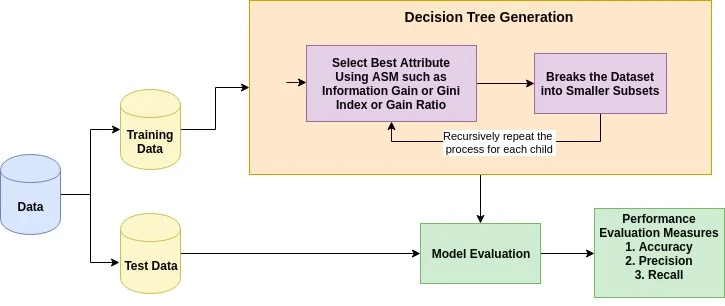

In [ ]:
!pip install --upgrade scikit-learn

# 1. Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import sklearn # machine learning

# 2. Import dataset

In [2]:
# import iris dataset with sklearn
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## For reference, here are pictures of the three flowers species:

![https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# 3. Dataset to Pandas DataFrame
Pandas Documentation : https://pandas.pydata.org/docs/reference/frame.html

In [3]:
# Put iris into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df_iris['target'] = iris.target

In [5]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# First 10 value of the dataset
print(df_iris.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

# 4. Exploratory data analysis

In [7]:
# Shape of the dataset (nb of rows and columns)
print(df_iris.shape)

# Name of the columns
print(df_iris.columns)

(150, 5)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [8]:
#Print information about the dataset DataFrame
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
# Description of Iris dataset (mean, std, min, max, quartiles)
print(df_iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### Frequency distribution of values in categorical variables

In [10]:
# Names of the target values
print(iris.target_names)

# Count of each target value
print(df_iris['target'].value_counts())

# Same as above but in percentage
print(df_iris['target'].value_counts(normalize=True))

['setosa' 'versicolor' 'virginica']
target
0    50
1    50
2    50
Name: count, dtype: int64
target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


We can see that the dataset in balanced in terms of its classes.

### Missing values in variables

In [11]:
df_iris.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Correlation between variables

In [13]:
# Correlation matrix between all the features
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


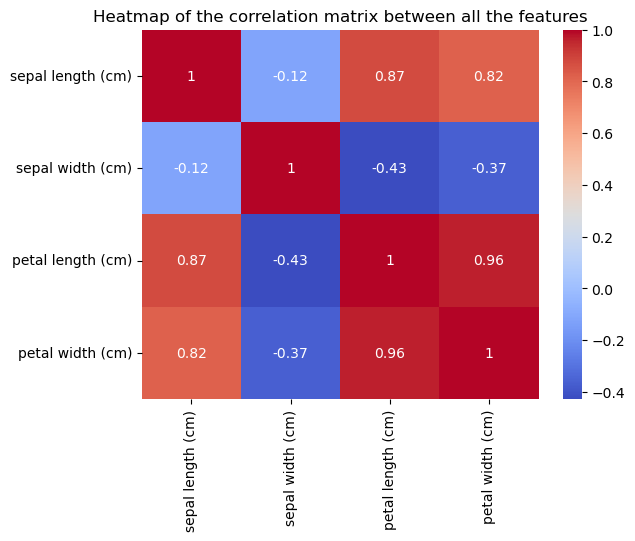

In [14]:
# Heatmap of the correlation matrix using seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html 
plt.title("Heatmap of the correlation matrix between all the features")
sns.heatmap(df_iris.drop('target',axis=1).corr(), annot=True, cmap='coolwarm') # annot = True to print the values inside the square
plt.show()

In [15]:
# print the most correlated features with the target variable (absolute value)


In [16]:
def rapport_corr(cible,data): #fonction qui calcule le rapport de corrélation
    #cible : 1 variable qualitative
    #data : un DataFrame qui contient des variables quantitatives
    #moyenne par variable
    m=data.mean()
    #SCT : variabilité totale = nbre d'ind*variance
    SCT=data.shape[0]*data.var(ddof=0)
    #DataFrame conditionnellement aux groupes
    Xb=data.groupby(cible)
    #effectifs conditionnels
    nk=Xb.size()
    #moyennes conditionnelles dans chaque groupe
    mk=Xb.mean()
    #pour chaque groupe écart à la moyenne par variable
    EMk=(mk-m)**2
    #pondéré par les effectifs du groupe
    EM=EMk.multiply(nk,axis=0)
    #somme des valeurs
    SCE=np.sum(EM,axis=0)
    #carré du rapport de corrélation
    R2=SCE/SCT
    R2trie=R2.sort_values(ascending=False)
    print(R2trie)
    #print(R2trie.index)
    plt.bar(range(1,R2trie.shape[0]+1),height=R2trie)
    return np.sqrt(R2)

petal length (cm)    0.941372
petal width (cm)     0.928883
sepal length (cm)    0.618706
sepal width (cm)     0.400783
dtype: float64


sepal length (cm)    0.786578
sepal width (cm)     0.633074
petal length (cm)    0.970243
petal width (cm)     0.963786
dtype: float64

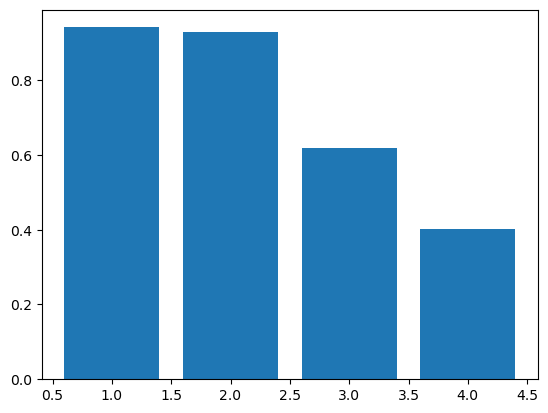

In [17]:
rapport_corr(df_iris['target'],df_iris.drop('target',axis=1))

### Visualizing the data

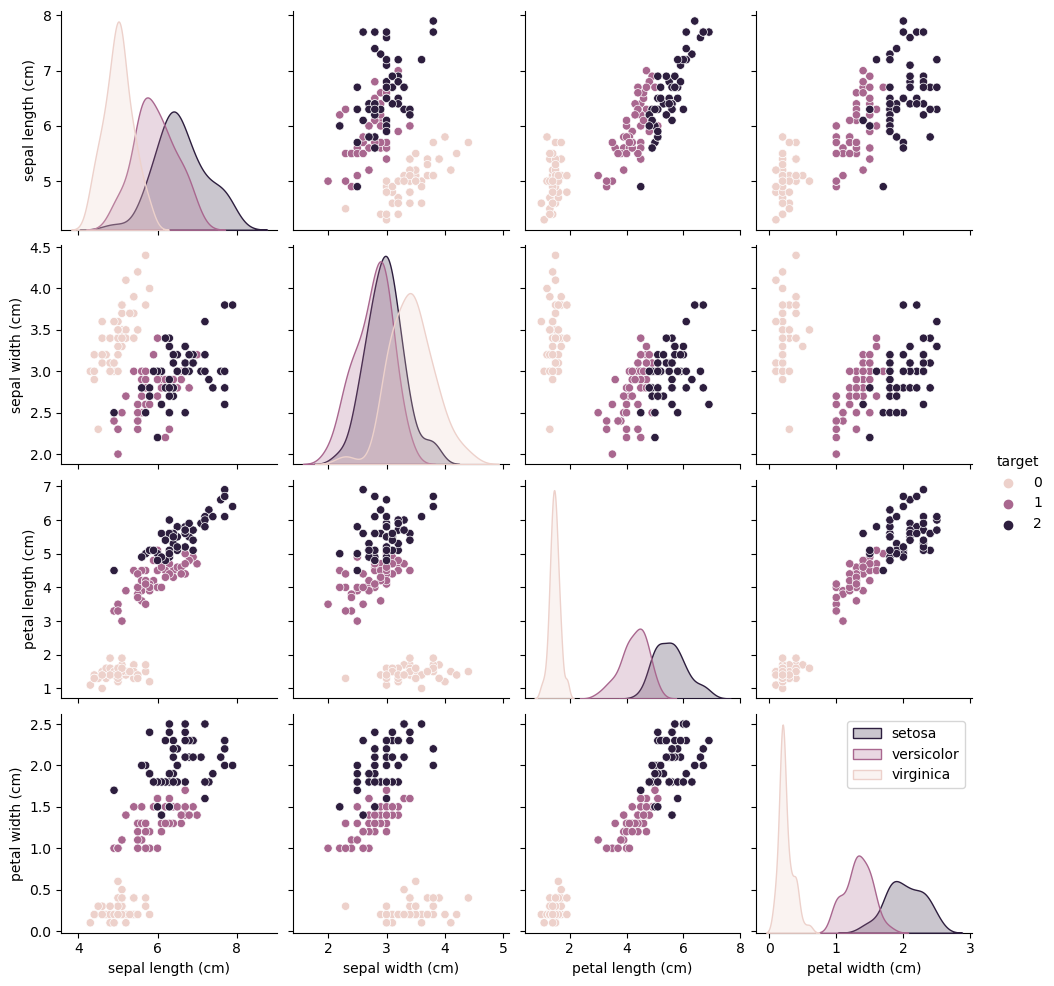

In [18]:
# Plot the pairwise relations in the iris dataset
sns.pairplot(df_iris, hue='target', height=2.5)
plt.legend(iris.target_names)
plt.show()

# 5. Declare features vector and target variable

In [19]:
# X is the feature set and y is the target variable
X = df_iris.drop(['target'], axis=1)

y = df_iris['target']

# 6. Split data into separate training and test sets

In [20]:
# Use sklearn.model_selection 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# Check the shapes of each subset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 4) (50, 4)
(100,) (50,)


In [22]:
# Count the unique values in each of the subsets
print(y_train.value_counts())  
print(y_test.value_counts())  

target
1    35
2    34
0    31
Name: count, dtype: int64
target
0    19
2    16
1    15
Name: count, dtype: int64


# 7. Feature Engineering - Data Encoding

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [23]:
# check data types in X_train
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Data is already ready to be used for model training. <br>
This wouldn't have been the case if the data weren't numerical.

# 8. Decision Tree Classifier with criterion gini index

---

In [24]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model aka train the model on X_train
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

### Predict the Test set results with criterion gini index

In [25]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index using sklearn.metrics

In [26]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9800


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Check for overfitting and underfitting

In [27]:
#compare training and test accuracies 
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Training set score: {:.4f}'.format(accuracy_score(clf_gini.predict(X_train),y_train)))


print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9900
Training set score: 0.9900
Test set score: 0.9800


Here, the training-set accuracy score is 0.97 while the test-set accuracy to be 0.98. These two values are quite comparable. So, there is no sign of overfitting. 


In [28]:
acc_train, acc_test = [], []
for i in range(1,20):
  clf_gini_i = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)
  clf_gini_i.fit(X_train, y_train)
  acc_train.append(clf_gini_i.score(X_train, y_train))
  
  acc_test.append(clf_gini_i.score(X_test, y_test))
pd.DataFrame(data=[acc_train,acc_test], index=['train acc','test acc'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
train acc,0.66,0.95,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test acc,0.68,0.98,0.98,0.98,0.98,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96


We can see that from max_depth > 4 we encounter an overfitting problem

### Visualizing the decision tree with sklearn.tree

[Text(0.5416666666666666, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.25, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.25, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.5833333333333334, 0.08333333333333333, 'gini =

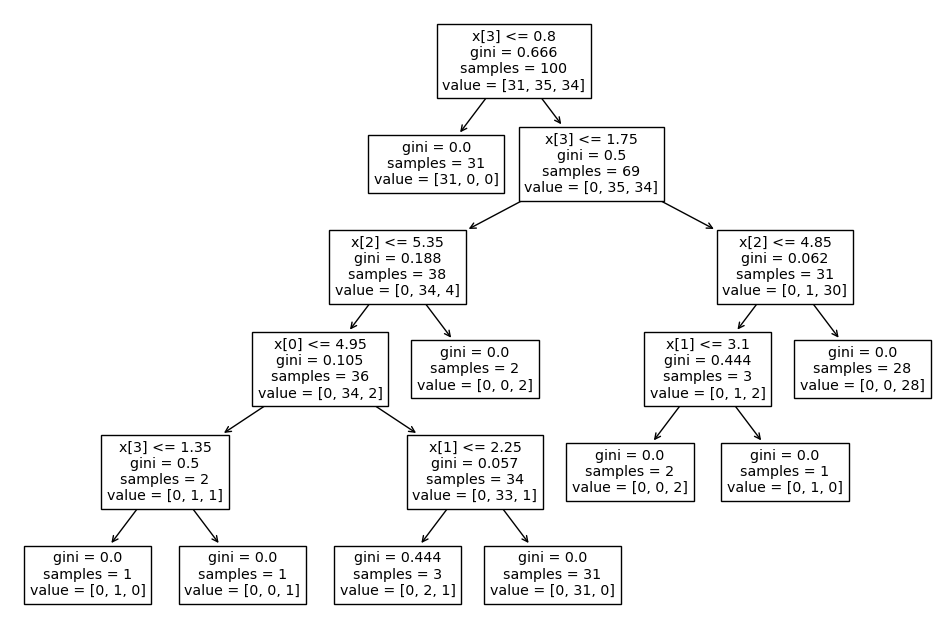

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [30]:
#df_iris[df_iris['petal width (cm)']<=0.8]

### Visualize decision-trees with graphviz

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


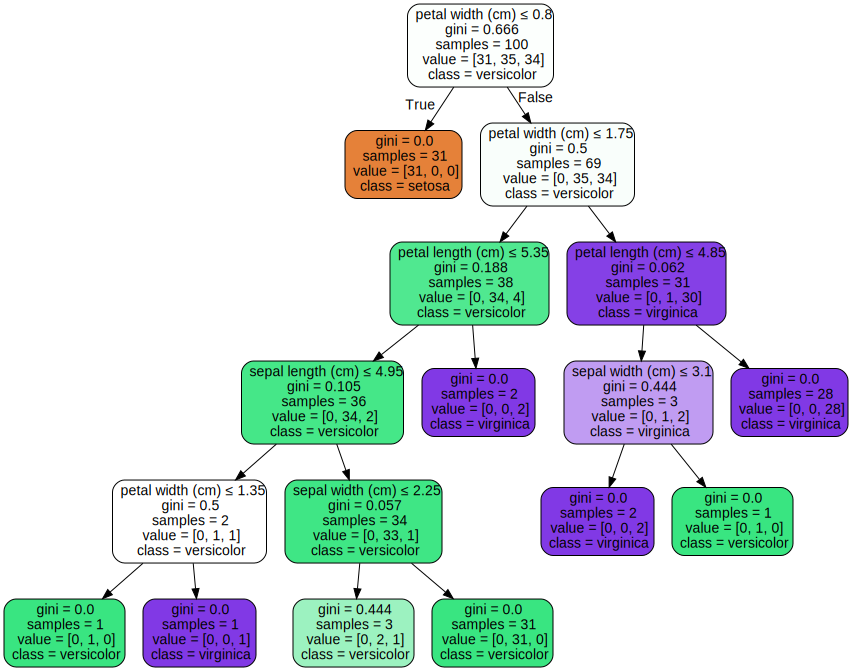

In [31]:
import graphviz 
print(X_train.columns)
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# 9. Decision Tree Classifier with criterion entropy

---



In [32]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

### Predict the Test set results with criterion entropy

In [33]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy scores with criterion entropy

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9600


### Check for overfitting and underfitting

In [35]:
#compare training and test accuracies 
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9900
Test set score: 0.9600


We can see that the training-set score and test-set score is same as above. These two values are quite comparable. So, there is no sign of overfitting. 


In [36]:
acc_train, acc_test = [], []
for i in range(1,20):
  clf_en_i = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
  clf_en_i.fit(X_train, y_train)
  acc_train.append(clf_en_i.score(X_train, y_train))
  
  acc_test.append(clf_en_i.score(X_test, y_test))
pd.DataFrame(data=[acc_train,acc_test], index=['train acc','test acc'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
train acc,0.66,0.95,0.97,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
test acc,0.68,0.98,0.98,0.98,0.96,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98


We can see that from max_depth > 5 we encounter an overfitting problem

### Visualize the decision tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.08333333333333333, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4444444444444444, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),


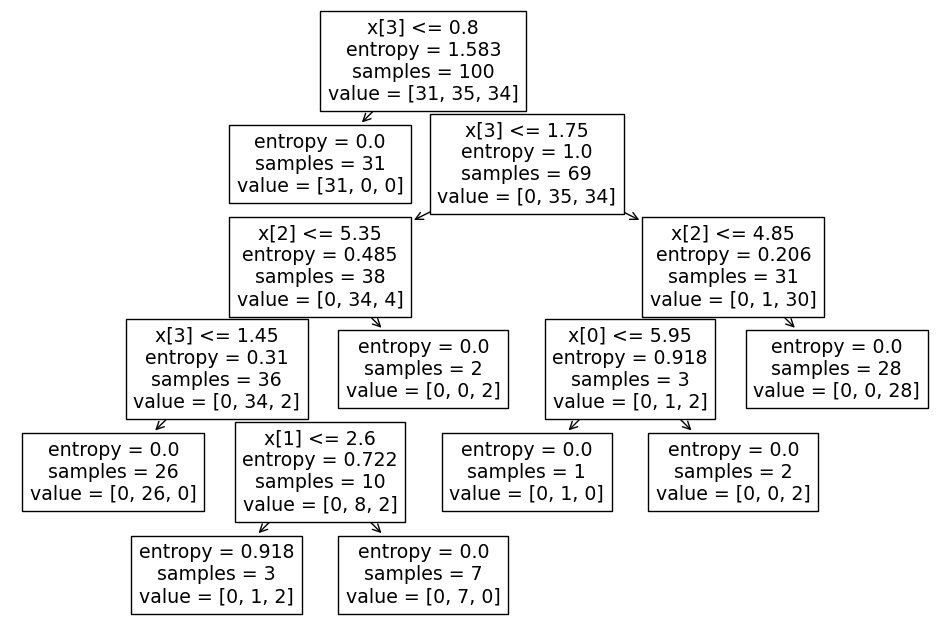

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualize the decision tree with graphviz

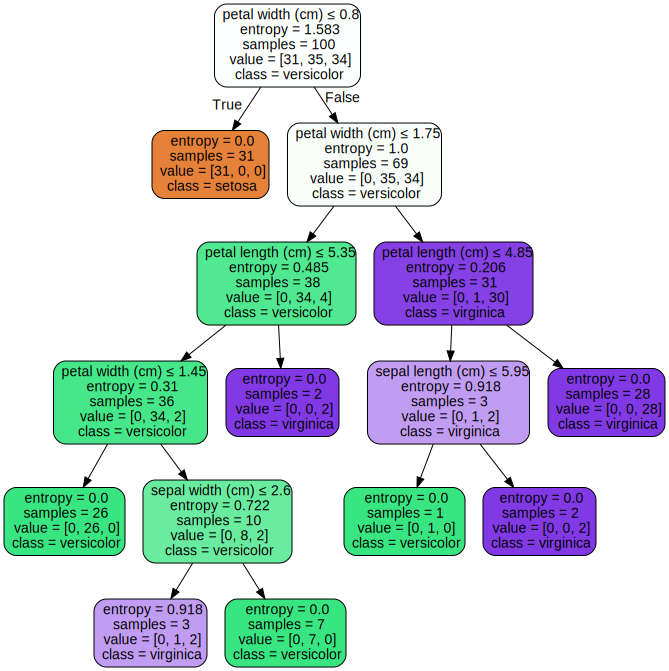

In [38]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=iris.feature_names,  
                              class_names=iris.target_names,
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

Based on the above analysis we can say that our classification model has a very good accuracy. The model is doing a very good job in terms of predicting the class labels. <br>
But, this analysis does not give the underlying distribution of values.

Using confusion matrices help give insight into the type of errors the model is making.

# 10. Confusion matrix


A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category. 


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



Confusion Matrice for GINI:


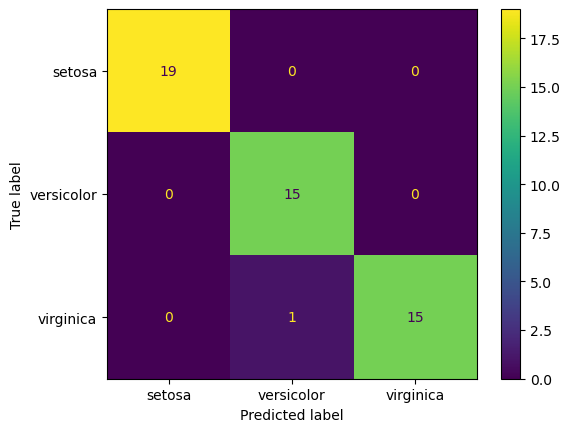

In [39]:
# Print the Confusion Matrix for GINI and identify the four pieces
# Use sklearn.metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for GINI
print("Confusion Matrice for GINI:")
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

Confusion Matrix for Entropy:


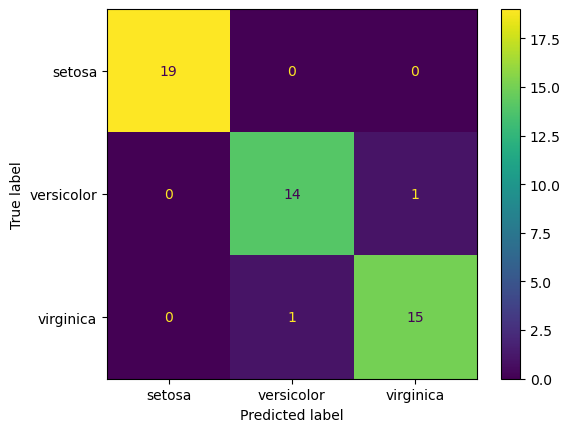

In [40]:
# Print the Confusion Matrix for Entropy and identify the four pieces

print("Confusion Matrix for Entropy:")
cm = confusion_matrix(y_test, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

# 11. Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

# Cross validation score for GINI with 10 different splits
scores_gini = cross_val_score(clf_gini, X, y, cv=10)
print("Cross-validation scores for GINI: {}".format(scores_gini))
print("Mean cross-validation score: {:.2f}".format(scores_gini.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores_gini.std()))

# Cross validation score for Entropy with 10 different splits
scores_en = cross_val_score(clf_en, X, y, cv=10)
print("\n\nCross-validation scores for Entropy: {}".format(scores_en))
print("Mean cross-validation score: {:.2f}".format(scores_en.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores_en.std()))


Cross-validation scores for GINI: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Mean cross-validation score: 0.96
Standard deviation of cross-validation score: 0.04


Cross-validation scores for Entropy: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Mean cross-validation score: 0.96
Standard deviation of cross-validation score: 0.04


# 12. Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.



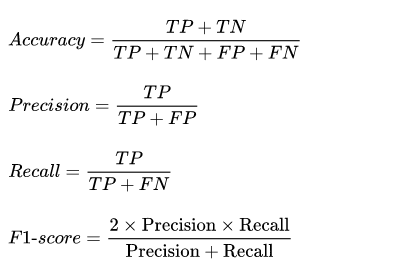

In [42]:
from sklearn.metrics import classification_report

# Classification report for GINI
print(classification_report(y_test, y_pred_gini, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [43]:
# Classification report for Entropy
print(classification_report(y_test, y_pred_en, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# 13. Decision Boundaries

The two most correlated features for the classification are the petal length and the petal width whereas the two least correlated features are the sepal length and the sepal width.

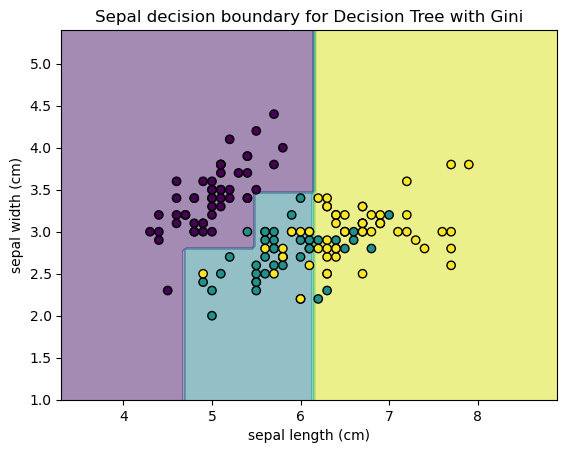

In [44]:
# Print decision boundary for decision tree with gini index
from sklearn.inspection import DecisionBoundaryDisplay
#import sklearn.inspection

# Decision boundary for sepal length and sepal width only
X = iris.data[:, :2]
sepal_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
sepal_classifier.fit(X, iris.target)

disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(sepal_classifier, X, xlabel=iris.feature_names[0],
                                              ylabel=iris.feature_names[1], alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Sepal decision boundary for Decision Tree with Gini")
plt.show()

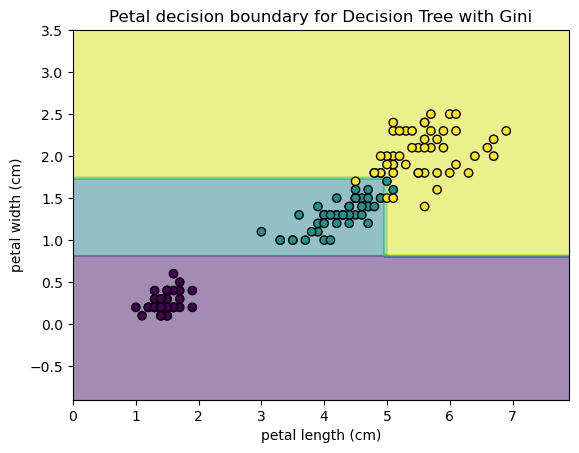

In [45]:
# Decision boundary for petal length and petal width only
X = iris.data[:, 2:]
petal_classifier = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0)
petal_classifier.fit(X, iris.target)

disp = DecisionBoundaryDisplay.from_estimator(petal_classifier, X, xlabel=iris.feature_names[2],
                                              ylabel=iris.feature_names[3], alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Petal decision boundary for Decision Tree with Gini")
plt.show()

Visually, we can see that using only the petals attributes, the classification is better than using only the sepal attributes.

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique. It is used to reduce the number of features in a dataset. It is used to reduce the complexity of the model and to reduce the training time. It is also used to visualise high dimensional data.

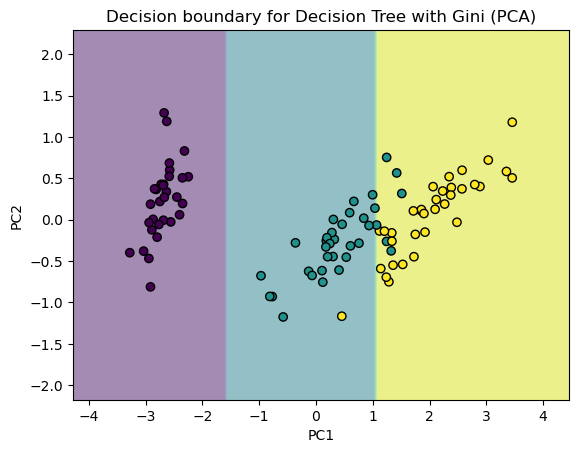

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 principal components for 2D plot
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
pca_classifier.fit(X_train_pca, y_train)

disp = DecisionBoundaryDisplay.from_estimator(pca_classifier, X_train_pca, xlabel='PC1',
                                              ylabel='PC2', alpha=0.5)
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:,
                 1], c=y_train, edgecolor="k")
plt.title("Decision boundary for Decision Tree with Gini (PCA)")
plt.show()

# References : 
1. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#13.-Decision-Tree-Classifier-with-criterion-gini-index-
2. https://scikit-learn.org/
3. https://www.datacamp.com/tutorial/machine-learning-in-r
4. https://www.datacamp.com/tutorial/decision-tree-classification-python 
5. https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/